It has three columns that record user activity over time:
user_id: A hash that uniquely identifies the user.
activity_date: The date of the activity
activity_type: The type of activity

The company would like to predict which users have a high chance of a FUTURE purchase given the user's PAST activities.

Using the training data, build a model that predicts which user_id's will make a purchase in the future.
Score the test data with the model you've created and sort the top 1,000 user_id's from most to least likely to purchase.

Please submit the following:
* Answers to the following questions:
  1. How did you approach the time-based aspect of the problem?
  2. Describe which activity types you believe are most useful in predicting which user will purchase in the future.
  3. If you had more time, what else would you do?
* Provide a file (csv, tsv, or similar) containing the top 1,000 user_id's most likely to convert.
* Your code that you used to generate your answers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from pandas_visual_analysis import VisualAnalysis, DataSource
from pandas_profiling import ProfileReport
import ipywidgets 
ipywidgets.__version__

In [2]:
df=pd.read_csv(r'C:\\Users\kmmoh\Downloads\timeseries.csv')

In [3]:
df.shape

(26, 3)

In [4]:

profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)


In [5]:
profile.to_widgets()

Summarize dataset:   0%|          | 0/16 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
# In the above dataset columns name are there , and category type misplet words [Emailopen,customer] are there

In [7]:
df.columns=['Userid','Data','Activity']

In [8]:
df.head(3)

,Userid,Data,Activity
0,0000ecf58c94668,2014-07-01,EmailOpen
1,0000ecf58c94668,2014-07-03,Purchase
2,0000ecf58c94668,2014-07-04,Customersupport


In [9]:
df[df['Activity'] =='Emailopen']


,Userid,Data,Activity
11,00012205dd4613b,2013-10-02,Emailopen
12,00012205dd4613b,2013-10-30,Emailopen


In [10]:
df[df['Activity'] =='customersupport']

,Userid,Data,Activity
17,00022618457fcf2,2013-08-02,customersupport
19,000256826de4432,2014-10-07,customersupport


In [13]:
#pd.str.capitalize()
df["Activity"]=df["Activity"].str.lower()

In [35]:
df.groupby(df['Userid'],axis=1)

<AxesSubplot:>

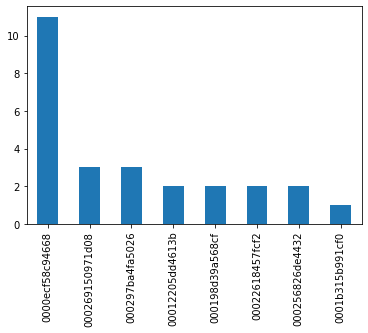

In [32]:
df['Userid'].value_counts().plot.bar()

<AxesSubplot:ylabel='Userid'>

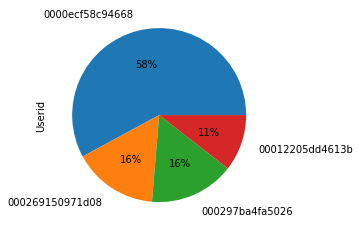

In [37]:
labels=df['Userid'].value_counts().index
df['Userid'].value_counts().head(4).plot.pie(labels=labels,autopct='%1.0f%%',labeldistance=1.2)

Users have a high chance of a FUTURE purchase given the user's PAST activities

<AxesSubplot:xlabel='Userid', ylabel='count'>

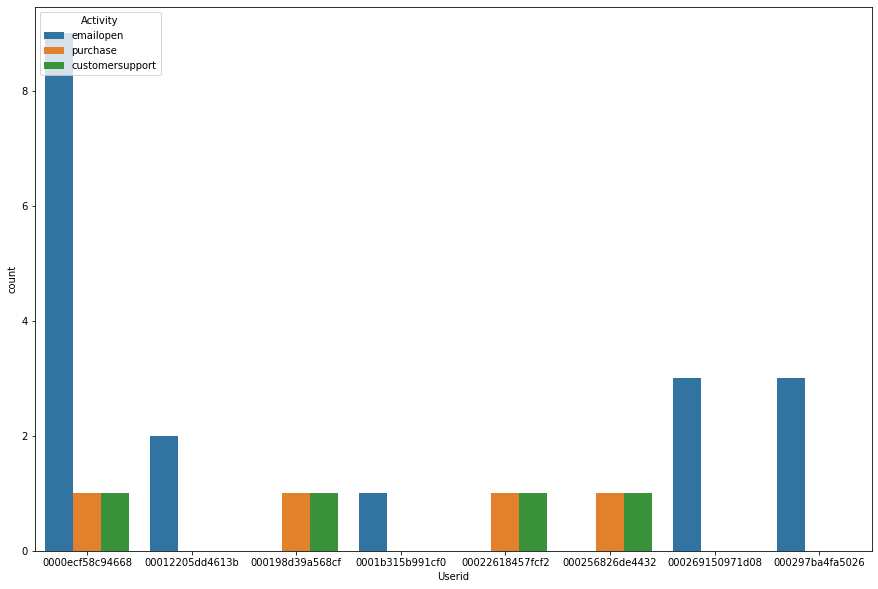

In [41]:
plt.figure(figsize=(15,10))
sns.countplot(df['Userid'],hue=df['Activity'])

'EmailOpen'activity types  are most useful in predicting which user will purchase in the future.